# Tarea 4

A partir de las lecturas de la Unidad, resuelva los planteamientos del problema
siguiente.

Se aplicará un examen de colocación de matemáticas a todos los estudiantes de un nuevo curso de una universidad. Las calificaciones obtenidas de 20 estudiantes se muestran en la tabla siguiente:

| Examen de colocación | Calificación en curso |
|----------------------|-----------------------|
| 50                   | 53                    |
| 35                   | 41                    |
| 35                   | 61                    |
| 40                   | 56                    |
| 55                   | 68                    |
| 65                   | 36                    |
| 35                   | 11                    |
| 60                   | 70                    |
| 90                   | 79                    |
| 35                   | 50                    |
| 90                   | 54                    |
| 80                   | 91                    |
| 60                   | 48                    |
| 60                   | 71                    |
| 60                   | 71                    |
| 40                   | 47                    |
| 55                   | 53                    |
| 50                   | 68                    |
| 65                   | 57                    |
| 50                   | 79                    |

1. Elabore un diagrama de dispersión.


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



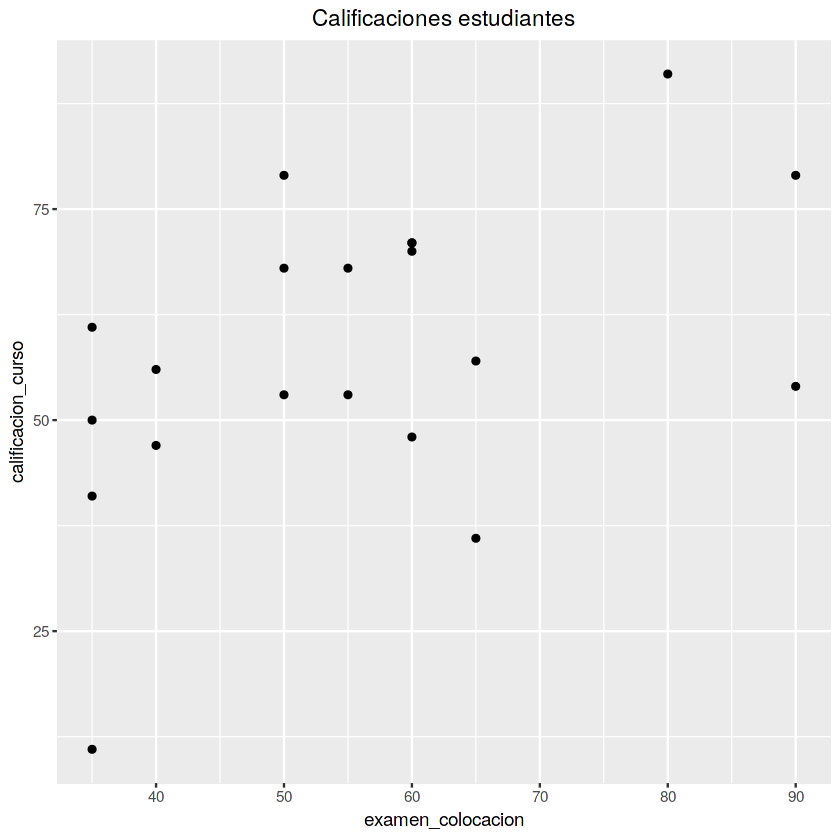

In [2]:
library(ggplot2)
library(dplyr)

examen_colocacion <- c(50, 35, 35, 40, 55, 65, 35, 60, 90, 35, 90, 80, 60, 60, 60, 40, 55, 50, 65, 50)
calificacion_curso <- c(53, 41, 61, 56, 68, 36, 11, 70, 79, 50, 54, 91, 48, 71, 71, 47, 53, 68, 57, 79)

estudiantes_universitarios <- data.frame(examen_colocacion, calificacion_curso)

mi_grafico <- estudiantes_universitarios %>%
  ggplot(aes(x=examen_colocacion, y=calificacion_curso)) +
    ggtitle("Calificaciones estudiantes") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_point(stat="identity")
plot(mi_grafico)

2. Encuentre la ecuación de la recta de regresión con la finalidad de
predecir las calificaciones del curso a partir de las del examen de
colocación.

```
y = a + bx + e

Donde

    a: Es la calificación del examen de colocación.

    b: Es la calificación del curso.

    e: Es el error estándar.
```

3. Determine el coeficiente de correlación.

In [19]:
print(paste("La sumatoria de examen colocacion=", sum(examen_colocacion)))
print(paste("La sumatoria de calificacion curso=", sum(calificacion_curso)))
media_examen_colocacion <- mean(examen_colocacion)
media_calificacion_curso <- mean(calificacion_curso)

print(paste("media examen colocacion:",media_examen_colocacion))
print(paste("media calificación curso:",media_calificacion_curso))

estudiantes_universitarios$desv_examen_colocacion <- estudiantes_universitarios$examen_colocacion - media_examen_colocacion
estudiantes_universitarios$desv_calificacion_curso <- estudiantes_universitarios$calificacion_curso - media_calificacion_curso
estudiantes_universitarios$desv_ec_x_desv_cc <- estudiantes_universitarios$desv_examen_colocacion * estudiantes_universitarios$desv_calificacion_curso

suma_desvec_desvcc <- sum(estudiantes_universitarios$desv_ec_x_desv_cc)
print(paste("La sumatoria de desv ec * desv cc =", suma_desvec_desvcc))

suma_desvec_cuad <- sum( estudiantes_universitarios$desv_examen_colocacion ^2)
print(paste("La sumatoria de desv ec ^2 =", suma_desvec_cuad))
suma_desvcc_cuad <- sum( estudiantes_universitarios$desv_calificacion_curso ^2)
print(paste("La sumatoria de desv cc ^2 =", suma_desvcc_cuad))

[1] "La sumatoria de examen colocacion= 1110"
[1] "La sumatoria de calificacion curso= 1164"
[1] "media examen colocacion: 55.5"
[1] "media calificación curso: 58.2"
[1] "La sumatoria de desv ec * desv cc = 2773"
[1] "La sumatoria de desv ec ^2 = 5495"
[1] "La sumatoria de desv cc ^2 = 5999.2"


De lo anterior, el dataframe estudiantes_universitarios contiene los siguientes valores:

| n  | examen colocacion |  calificacion curso |  desv ec | desv cc | desv ec * desv cc |
|----|-------------------|---------------------|----------|---------|-------------------|
| 1  | 50                | 53                  | -5.5     | -5.2    | 28.6              |
| 2  | 35                | 41                  | -20.5    | -17.2   | 352.6             |
| 3  | 35                | 61                  | -20.5    | 2.8     | -57.4             |
| 4  | 40                | 56                  | -15.5    | -2.2    | 34.1              |
| 5  | 55                | 68                  | -0.5     | 9.8     | -4.9              |
| 6  | 65                | 36                  | 9.5      | -22.2   | -210.9            |
| 7  | 35                | 11                  | -20.5    | -47.2   | 967.6             |
| 8  | 60                | 70                  | 4.5      | 11.8    | 53.1              |
| 9  | 90                | 79                  | 34.5     | 20.8    | 717.6             |
| 10 | 35                | 50                  | -20.5    | -8.2    | 168.1             |
| 11 | 90                | 54                  | 34.5     | -4.2    | -144.9            |
| 12 | 80                | 91                  | 24.5     | 32.8    | 803.6             |
| 13 | 60                | 48                  | 4.5      | -10.2   | -45.9             |
| 14 | 60                | 71                  | 4.5      | 12.8    | 57.6              |
| 15 | 60                | 71                  | 4.5      | 12.8    | 57.6              |
| 16 | 40                | 47                  | -15.5    | -11.2   | 173.6             |
| 17 | 55                | 53                  | -0.5     | -5.2    | 2.6               |
| 18 | 50                | 68                  | -5.5     | 9.8     | -53.9             |
| 19 | 65                | 57                  | 9.5      | -1.2    | -11.4             |
| 20 | 50                | 79                  | -5.5     | 20.8    | -114.4            |


| n  | sum(examen colocacion) | sum(calificacion curso) | sum(desv ec^2) | sum(desv cc^2) | sum(desv ec * desv cc) |
|----|------------------------|-------------------------|---------------|---------------|------------------------|
| 20 | 1110                   | 1164                    | 5495          | 5999.2        | 2773                   |

```
Donde:
    ec = examen colocación
    cc = calificacion curso
    desv ec = examen colocacion - media examen colocacion
    desv cc = calificacion curso - media calificacion curso
```

Calculando la covarianza con la fórmula $$cov(ex\ colocacion,\ cal\ curso)= \frac{\sum_{i=1}^n(desv\ ec * desv\ cc)}{n}$$
Obtenemos $$cov(ex\ colocacion,\ cal\ curso)=\frac{2773}{10}=277.3$$

Calculando la desviación estándar con la fórmula:

$$D(x)=\sqrt{\frac{\sum_{i=1}^n (x_{i} - \bar{x})^2}{n}}$$

Se obtiene:

$$D(ec)=\sqrt{\frac{5495}{10}}\ =\ 549.5$$

$$D(cc)=\sqrt{\frac{5999.20}{10}}\ =\ 599.92$$

Usando la fórmula para el coeficiente de correlación:

$$r_{x,y}=\frac{cov(x,y)}{D(x)D(y)}$$

Substituyendo:

$$r_{x,y}=\frac{cov(ex\ colocacion,\ cal\ curso)}{D(ec)D(cc)}\ =\ \frac{277.3}{549.5*599.92}$$

$$r_{x,y}\ = \ 0.00168235958$$

In [21]:
2773/10

[1] 277.3

In [17]:
cor(estudiantes_universitarios[,1:2])

,examen_colocacion,calificacion_curso
examen_colocacion,1.0000000,0.4829691
calificacion_curso,0.4829691,1.0000000


4. Interprete de manera breve el coeficiente de correlación.

5. Estime la calificación que obtendrá un alumno en el curso, si obtuvo 64 en el examen de colocación.

6. Si la calificación mínima aprobatoria para el curso es de 70, estime la calificación mínima que debe
obtener un estudiante en el examen de colocación para que, según la ecuación de regresión, obtenga el 70.